## Importação de bibliotecas

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=d26c7027742b9a4f45c554074b8f44bea3b7803676223797489bd58d7f359698
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7kz3p2s/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [2]:
!pip install auto-sklearn

In [3]:
!pip install dask distributed --upgrade

Requirement already up-to-date: dask in /usr/local/lib/python3.7/dist-packages (2021.4.0)
Requirement already up-to-date: distributed in /usr/local/lib/python3.7/dist-packages (2021.4.0)


In [4]:
!pip install pipelineprofiler

In [5]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression,SelectKBest,SelectPercentile, chi2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, MaxAbsScaler
import PipelineProfiler
import sklearn.metrics
import autosklearn.classification
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importação do dataset (D + SC + CC)



In [8]:
df_depressao = pd.read_csv('/content/drive/MyDrive/Lab Extensão I/Variaveis_Depressao+SC+CC.csv', delimiter=';')

In [9]:
df_depressao.head()

,D0,D1,D1A,D1B,D2,D9,D9A1,D9A2,D10,D11,D12,D12A,D13,D14,D14A,D15,D16,D17,D18,D19,D20,D21,D22,D22A,D22B,D22B1,D22C,D22D,D22D1,D23,D23A01,D23A02,D23A03,D23A04,D23A05,D23A06,D23A07,D23A08,D23A09,D23A10,D23A11,D23A12,D23A13,D23A14,D23A15,D23A16,D23A17,D23A18,D24A,D24B,D24C,D24D,D24E,D24F,D25,D26A,D26B,D26C,D26D,D26D1,D26E,D26F,D26F1,D26G,D26H,D26I,D26J,D26K,D26L,D26M,D26N,D26O,D26P,D26Q,D26R,D26S,D26T,D26U,D26V,D26W,D26W_1,D26X,D26Y,D26Z,D26AA,D26BB,D26CC,D26DD,D26EE,D26FF,D26GG,D26HH,D26II,D27,D27A,D28,D28A,D29,D29A,D29B,...,SC33_2,SC33_3,SC34,SC35,CC1A,CC1B,CC1C,CC1D,CC1E,CC1F,CC1G,CC1H,CC1I,CC1J,CC1K,CC1L,CC1M,CC1N,CC1O,CC1P,CC1Q,CC1R,CC1S,CC1T,CC2,CC2A01,CC2A02,CC2A03,CC2A04,CC2A05,CC2A06,CC2A07,CC2A08,CC2A09,CC2A10,CC2A11,CC2A12,CC3,CC3A,CC4,CC5,CC7,CC8,CC9,CC10A,CC10B,CC10C,CC10D,CC11,CC12,CC20A,CC20B,CC20C,CC20D,CC21,CC22,CC23,CC24B,CC24C,CC24E,CC24F,CC24G,CC24H,CC25,CC26A,CC26B,CC26C,CC27,CC28A,CC28B,CC28C,CC28D,CC28E,CC28F,CC28G,CC29,CC30,CC31A,CC31B,CC32,CC33,CC34,CC35,CC48,CC48A,CC49A,CC49B,CC49C,CC49D,CC50A,CC50B,CC50C,CC50D,CC50E,CC50I,CC51,CC52,CC53,CC54,CC55
0,1.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0,1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1,1,1,5,1,52.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1.0,0,0,4,2,5,1,5,5,5,5,1,2,4,100,30
1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,1.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,1,1,1,3.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,3,0,0,0,5,5,5,5,5,5,1,1,1,70,80
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,3.0,2.0,1.0,1.0,54.0,6.0,3.0,NaN,NaN,NaN,1.0,3.0,6.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,11.0,2.0,1.0,NaN,5.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,...,NaN,NaN,1,1,5,1,1,1,5,5,5,5,1,5,1,5,5,1,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0,1,4.0,4.0,8.0,5.0,7.0,6.0,2.0,10.0,1,5,1,1,1,52.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,10.0,30.0,1.0,8.0,2.0,5.0,5.0,5,1.0,4,0,2,2,5,5,5,5,5,5,1,2,1,50,1
3,1.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5,5,5,1,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0,1,4.0,6.0,8.0,9.0,0.0,4.0,2.0,240.0,5,5,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,30.0,24.0,2.0,10.0,4.0,7.0,2.0,1,NaN,0,0,12,7,5,5,1,5,5,5,1,1,4,100,2
4,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5

## Análise de Nulos

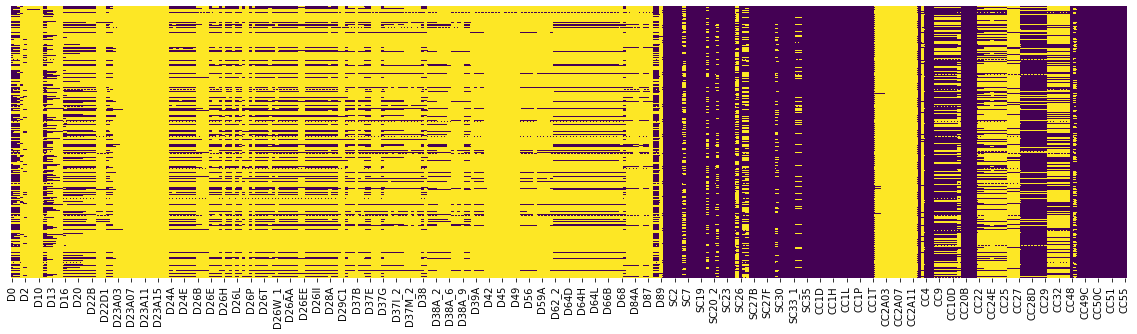

In [10]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df_depressao.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis',
           ax=ax)

In [11]:
excluir_nulos = []
nulos = df_depressao.isnull().sum()
nulos.sort_values(ascending=False,inplace=True)
for i in nulos.index:
    print(i,"--->",nulos[i])
    if nulos[i] >= 5037*0.9:
        excluir_nulos.append(i)

CC2A06 ---> 5037
D23A18 ---> 5037
D23A16 ---> 5037
D23A15 ---> 5037
D23A14 ---> 5037
D23A13 ---> 5037
D23A12 ---> 5037
D23A11 ---> 5037
D23A10 ---> 5037
CC2A04 ---> 5037
CC2A05 ---> 5037
D23A09 ---> 5037
CC2A12 ---> 5037
CC2A11 ---> 5037
CC2A10 ---> 5037
CC2A09 ---> 5037
CC2A08 ---> 5037
D23A17 ---> 5037
CC2A07 ---> 5037
D23A08 ---> 5036
D23A07 ---> 5036
D50 ---> 5035
CC2A03 ---> 5035
D45 ---> 5034
D48 ---> 5033
D49 ---> 5033
D23A06 ---> 5033
D47 ---> 5033
CC2A02 ---> 5032
D46 ---> 5031
D44 ---> 5031
D42_1 ---> 5031
D42 ---> 5031
D43 ---> 5031
D23A05 ---> 5030
D41 ---> 5026
D11 ---> 5022
D23A04 ---> 5010
D9A2 ---> 5008
D10 ---> 5007
D9A1 ---> 5007
D89 ---> 5000
D9 ---> 4992
CC2 ---> 4987
CC2A01 ---> 4987
D37B ---> 4973
D38C ---> 4959
D23A03 ---> 4959
D87A ---> 4945
D38A_9 ---> 4939
D15 ---> 4939
D29C1 ---> 4925
D58 ---> 4887
D38A_7B ---> 4881
D61 ---> 4877
D59 ---> 4863
D59A ---> 4863
D60 ---> 4863
D22D1 ---> 4859
D84C ---> 4849
D22C ---> 4837
D22D ---> 4837
D38A_7A ---> 4835
D38A_8 --

In [12]:
df_depressao.drop(excluir_nulos,axis=1,inplace=True)

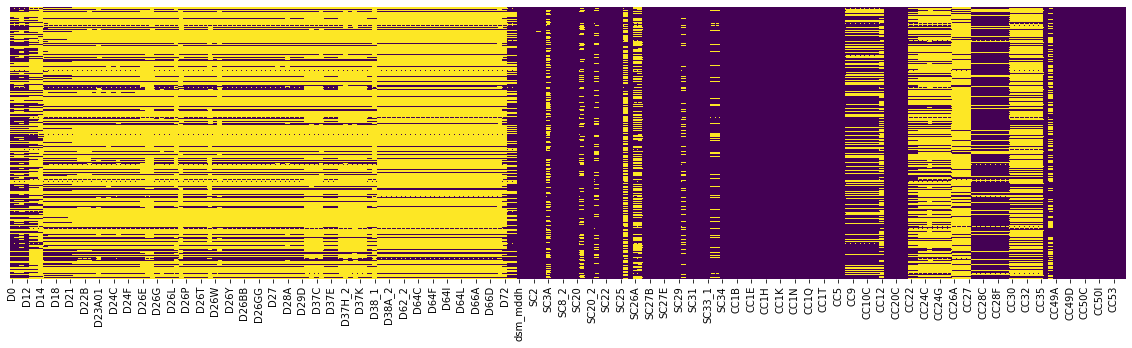

In [13]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df_depressao.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis',
           ax=ax)

In [14]:
df_depressao.isnull().sum()

D0      1647
D1      2118
D1A     2558
D12     1692
D12A    3382
        ... 
CC51       0
CC52       0
CC53       0
CC54       0
CC55       0
Length: 231, dtype: int64

In [15]:
X_train = df_depressao.drop(['dsm_mddh'], axis=1)
y_train = df_depressao['dsm_mddh']

X_train.fillna(0, inplace=True)

Melhores_Atributos = SelectKBest(chi2, k=50).fit(X_train, y_train)
Melhores_Atributos.get_support()
Lista_Melhores = list(X_train.columns[Melhores_Atributos.get_support()])
Score_Melhores = pd.Series(Melhores_Atributos.scores_)
Score_Melhores.index = X_train.columns
Score_Melhores = Score_Melhores.sort_values(ascending=False)
j = 0
for i in Score_Melhores.index:
    j += 1
    print(j, '%s --->  %f'%(i,Score_Melhores[i]))

1 D38B --->  376324.522532
2 D26F --->  203217.163829
3 D29 --->  203164.173805
4 D37C --->  161648.680891
5 D64D --->  122495.016855
6 D68 --->  120507.915246
7 D38A_1 --->  106365.747808
8 D64C --->  101580.255784
9 D64G --->  70938.079197
10 D22A --->  65480.161828
11 D64N --->  38876.423548
12 D64J --->  35554.172267
13 D64A --->  35500.675450
14 D37A --->  34057.346753
15 D64M --->  31184.074071
16 D37H_1 --->  30646.916442
17 D64I --->  30536.177596
18 D37I_1 --->  27660.276754
19 D64K --->  24509.401380
20 D66B --->  23001.776898
21 D64B --->  22534.671443
22 D23A01 --->  22277.928912
23 D64H --->  19756.739771
24 CC49A --->  19222.207165
25 D64E --->  18161.071625
26 CC22 --->  17728.985165
27 D64L --->  15934.737756
28 CC55 --->  13964.494177
29 CC35 --->  13654.396630
30 D66A --->  11252.189846
31 D29A --->  11215.610376
32 D26CC --->  9618.565167
33 D26Z --->  9385.703817
34 D26I --->  9024.533518
35 D64F --->  8932.119259
36 D28 --->  8565.766138
37 D26W --->  8219.333493
3

In [16]:
Lista_Melhores.append('dsm_mddh')
df_depressao_50 = df_depressao[Lista_Melhores]
df_depressao_50

,D12A,D22A,D22B1,D23A01,D26F,D26I,D26L,D26W,D26W_1,D26Z,D26BB,D26CC,D26FF,D27,D28,D29,D29A,D37A,D37C,D37D,D37H_1,D37I_1,D38,D38A_1,D38B,D64A,D64B,D64C,D64D,D64E,D64F,D64G,D64H,D64I,D64J,D64K,D64L,D64M,D64N,D66A,D66B,D66C,D66D,D68,D72,CC9,CC22,CC35,CC49A,CC55,dsm_mddh
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,52.0,NaN,0,30,5
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3,80,5
2,NaN,54.0,3.0,3.0,11.0,5.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,30.0,4.0,2.0,3.0,1.0,3.0,2.0,4.0,3.0,2.0,3.0,7.0,1.0,2.0,4.0,5.0,7.0,6.0,8.0,5.0,1.0,4.0,52.0,5.0,4,1,1
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,2.0,0,2,5
4,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,48.0,10.0,2,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,5
5033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10,5
5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30,5
5035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,40,5


In [17]:
X_train = df_depressao.drop(['dsm_mddh'], axis=1)
y_train = df_depressao['dsm_mddh']

lista=[]
for x in X_train.columns:
  if x[0] == "C":
    lista.append(x)

X_train = X_train[lista]

X_train.fillna(0, inplace=True)

Melhores_Atributos = SelectKBest(chi2, k=10).fit(X_train, y_train)
Melhores_Atributos.get_support()
Lista_Melhores2 = list(X_train.columns[Melhores_Atributos.get_support()])
Score_Melhores = pd.Series(Melhores_Atributos.scores_)
Score_Melhores.index = X_train.columns
Score_Melhores = Score_Melhores.sort_values(ascending=False)
j = 0
for i in Score_Melhores.index:
    j += 1
    print(j, '%s --->  %f'%(i,Score_Melhores[i]))

1 CC49A --->  19222.207165
2 CC22 --->  17728.985165
3 CC55 --->  13964.494177
4 CC35 --->  13654.396630
5 CC9 --->  6667.313020
6 CC30 --->  5955.508839
7 CC54 --->  5930.771532
8 CC31A --->  5153.246408
9 CC49B --->  2869.289500
10 CC12 --->  2752.340544
11 CC49D --->  2197.800094
12 CC49C --->  1672.134306
13 CC4 --->  1568.440066
14 CC10B --->  1062.275914
15 CC5 --->  980.470116
16 CC34 --->  818.189584
17 CC31B --->  277.716458
18 CC10C --->  267.817848
19 CC20A --->  256.577476
20 CC10D --->  235.328532
21 CC23 --->  229.508224
22 CC24C --->  228.327562
23 CC20B --->  220.350240
24 CC33 --->  183.849785
25 CC24B --->  162.572746
26 CC1C --->  152.972962
27 CC24F --->  136.231705
28 CC20D --->  135.361250
29 CC28C --->  131.877990
30 CC20C --->  118.991924
31 CC28A --->  117.503552
32 CC10A --->  110.659733
33 CC24H --->  107.158830
34 CC8 --->  99.102683
35 CC11 --->  97.860861
36 CC25 --->  96.770084
37 CC28F --->  86.363374
38 CC26C --->  81.174121
39 CC24G --->  80.995567
40 

In [18]:
Lista_Melhores2.append('dsm_mddh')
df_cc_10 = df_depressao[Lista_Melhores2]
df_cc_10

,CC9,CC12,CC22,CC30,CC31A,CC35,CC49A,CC49B,CC54,CC55,dsm_mddh
0,0.0,NaN,52.0,NaN,NaN,NaN,0,0,100,30,5
1,NaN,NaN,3.0,NaN,NaN,NaN,3,0,70,80,5
2,4.0,10.0,52.0,10.0,30.0,5.0,4,0,50,1,1
3,6.0,240.0,NaN,30.0,24.0,2.0,0,0,100,2,5
4,3.0,NaN,48.0,3.0,20.0,10.0,2,0,6,6,5
...,...,...,...,...,...,...,...,...,...,...,...
5032,NaN,NaN,NaN,NaN,NaN,NaN,0,0,10,20,5
5033,NaN,NaN,NaN,NaN,NaN,NaN,2,0,50,10,5
5034,NaN,NaN,NaN,NaN,NaN,NaN,1,0,60,30,5
5035,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,40,5


In [19]:
X_train = df_depressao.drop(['dsm_mddh'], axis=1)
y_train = df_depressao['dsm_mddh']

lista=[]
for x in X_train.columns:
  if x[0] == "S":
    lista.append(x)

X_train = X_train[lista]

X_train.fillna(0, inplace=True)

Melhores_Atributos = SelectKBest(chi2, k=10).fit(X_train, y_train)
Melhores_Atributos.get_support()
Lista_Melhores3 = list(X_train.columns[Melhores_Atributos.get_support()])
Score_Melhores = pd.Series(Melhores_Atributos.scores_)
Score_Melhores.index = X_train.columns
Score_Melhores = Score_Melhores.sort_values(ascending=False)
j = 0
for i in Score_Melhores.index:
    j += 1
    print(j, '%s --->  %f'%(i,Score_Melhores[i]))

1 SC21 --->  947.733493
2 SC23 --->  917.253256
3 SC26B --->  872.746627
4 SC22 --->  870.918474
5 SC26A --->  759.145364
6 SC25A --->  688.024953
7 SC20A --->  687.084575
8 SC25 --->  458.395191
9 SC26 --->  363.545882
10 SC20 --->  309.262892
11 SC20_3 --->  255.309532
12 SC29A --->  226.694494
13 SC28 --->  137.670850
14 SC20_1 --->  120.056163
15 SC2 --->  109.304377
16 SC29 --->  100.765297
17 SC27E --->  92.481417
18 SC20_2 --->  88.345321
19 SC8_2 --->  81.886198
20 SC30 --->  70.353606
21 SC27A --->  64.133151
22 SC33_3 --->  58.153644
23 SC27D --->  56.202999
24 SC35 --->  54.339174
25 SC33_2 --->  46.728009
26 SC8_1 --->  45.181622
27 SC27B --->  41.305254
28 SC27F --->  30.165527
29 SC3A --->  28.334394
30 SC33_1 --->  25.461555
31 SC31 --->  23.864983
32 SC1_1 --->  22.945068
33 SC34 --->  22.894574
34 SC27C --->  15.335387
35 SC33 --->  14.982527
36 SC32 --->  10.605342
37 SC7 --->  7.281925
38 SC3 --->  2.952524
39 SC1 --->  2.403861
40 SC9 --->  2.137188
41 SC24 --->  1.

In [20]:
Lista_Melhores3.append('dsm_mddh')
df_sc_10 = df_depressao[Lista_Melhores3]
df_sc_10

,SC20,SC20A,SC21,SC22,SC23,SC25,SC25A,SC26,SC26A,SC26B,dsm_mddh
0,5,5.0,1,1,5,5,NaN,1,NaN,NaN,5
1,1,NaN,1,1,1,5,NaN,1,NaN,NaN,5
2,1,NaN,1,1,1,1,5.0,1,NaN,NaN,1
3,1,NaN,1,1,5,5,NaN,5,5.0,5.0,5
4,5,5.0,1,1,5,1,5.0,1,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
5032,5,5.0,1,1,1,5,NaN,5,5.0,5.0,5
5033,5,5.0,5,5,5,5,NaN,5,5.0,5.0,5
5034,5,5.0,5,5,5,5,NaN,5,5.0,5.0,5
5035,5,5.0,5,5,5,5,NaN,5,5.0,5.0,5


In [21]:
X_train = df_depressao.drop(['dsm_mddh'], axis=1)
y_train = df_depressao['dsm_mddh']

lista=[]
for x in X_train.columns:
  if x[0] == "D":
    lista.append(x)

X_train = X_train[lista]

X_train.fillna(0, inplace=True)

Melhores_Atributos = SelectKBest(chi2, k=30).fit(X_train, y_train)
Melhores_Atributos.get_support()
Lista_Melhores4 = list(X_train.columns[Melhores_Atributos.get_support()])
Score_Melhores = pd.Series(Melhores_Atributos.scores_)
Score_Melhores.index = X_train.columns
Score_Melhores = Score_Melhores.sort_values(ascending=False)
j = 0
for i in Score_Melhores.index:
    j += 1
    print(j, '%s --->  %f'%(i,Score_Melhores[i]))

1 D38B --->  376324.522532
2 D26F --->  203217.163829
3 D29 --->  203164.173805
4 D37C --->  161648.680891
5 D64D --->  122495.016855
6 D68 --->  120507.915246
7 D38A_1 --->  106365.747808
8 D64C --->  101580.255784
9 D64G --->  70938.079197
10 D22A --->  65480.161828
11 D64N --->  38876.423548
12 D64J --->  35554.172267
13 D64A --->  35500.675450
14 D37A --->  34057.346753
15 D64M --->  31184.074071
16 D37H_1 --->  30646.916442
17 D64I --->  30536.177596
18 D37I_1 --->  27660.276754
19 D64K --->  24509.401380
20 D66B --->  23001.776898
21 D64B --->  22534.671443
22 D23A01 --->  22277.928912
23 D64H --->  19756.739771
24 D64E --->  18161.071625
25 D64L --->  15934.737756
26 D66A --->  11252.189846
27 D29A --->  11215.610376
28 D26CC --->  9618.565167
29 D26Z --->  9385.703817
30 D26I --->  9024.533518
31 D64F --->  8932.119259
32 D28 --->  8565.766138
33 D26W --->  8219.333493
34 D66D --->  8205.486079
35 D22B1 --->  8123.982367
36 D72 --->  7968.224293
37 D27 --->  7781.718969
38 D66C

In [22]:
Lista_Melhores4.append('dsm_mddh')
df_dd_30 = df_depressao[Lista_Melhores4]
df_dd_30

,D22A,D23A01,D26F,D26I,D26Z,D26CC,D29,D29A,D37A,D37C,D37H_1,D37I_1,D38A_1,D38B,D64A,D64B,D64C,D64D,D64E,D64G,D64H,D64I,D64J,D64K,D64L,D64M,D64N,D66A,D66B,D68,dsm_mddh
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,54.0,3.0,11.0,5.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,30.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0,2.0,3.0,7.0,1.0,2.0,4.0,5.0,7.0,5.0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [23]:
df_depressao_2 = pd.concat([df_cc_10.drop('dsm_mddh', axis=1), 
                            df_dd_30.drop('dsm_mddh', axis=1), 
                            df_sc_10], axis=1)
df_depressao_2

,CC9,CC12,CC22,CC30,CC31A,CC35,CC49A,CC49B,CC54,CC55,D22A,D23A01,D26F,D26I,D26Z,D26CC,D29,D29A,D37A,D37C,D37H_1,D37I_1,D38A_1,D38B,D64A,D64B,D64C,D64D,D64E,D64G,D64H,D64I,D64J,D64K,D64L,D64M,D64N,D66A,D66B,D68,SC20,SC20A,SC21,SC22,SC23,SC25,SC25A,SC26,SC26A,SC26B,dsm_mddh
0,0.0,NaN,52.0,NaN,NaN,NaN,0,0,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,1,1,5,5,NaN,1,NaN,NaN,5
1,NaN,NaN,3.0,NaN,NaN,NaN,3,0,70,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1,5,NaN,1,NaN,NaN,5
2,4.0,10.0,52.0,10.0,30.0,5.0,4,0,50,1,54.0,3.0,11.0,5.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,30.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0,2.0,3.0,7.0,1.0,2.0,4.0,5.0,7.0,5.0,1,NaN,1,1,1,1,5.0,1,NaN,NaN,1
3,6.0,240.0,NaN,30.0,24.0,2.0,0,0,100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,5,5,NaN,5,5.0,5.0,5
4,3.0,NaN,48.0,3.0,20.0,10.0,2,0,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,1,1,5,1,5.0,1,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,NaN,NaN,NaN,NaN,NaN,NaN,0,0,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,1,1,1,5,NaN,5,5.0,5.0,5
5033,NaN,NaN,NaN,NaN,NaN,NaN,2,0,50,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,5,5,5,5,NaN,5,5.0,5.0,5
5034,NaN,NaN,NaN,NaN,NaN,NaN,1,0,60,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,5,5,5,5,NaN,5,5.0,5.0,5
5035,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,5,5,5,5,NaN,5,5.0,5.0,5


## Pandas Profiling

In [24]:
#pfl_df_depressao = ProfileReport(df_depressao_50, title='Pandas Profiling Report', html={'style':{'full_width':False}})
#pfl_df_depressao.to_file(output_file="report_pandas_depressao_2.html")

In [25]:
count_1 = len(df_depressao_50[df_depressao_50.dsm_mddh == 1]) # Diagnostico Negativo
count_1

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


884

In [26]:
count_5 = len(df_depressao_50[df_depressao_50.dsm_mddh == 5]) # Diagnostico Positivo
count_5

4153

In [27]:
df_balanceado = df_depressao_50[df_depressao_50.dsm_mddh == 5].sample(count_1, replace=True)
df_balanceado = pd.concat([df_balanceado,df_depressao_50[df_depressao_50.dsm_mddh == 1]], axis=0)
df_balanceado.shape

(1768, 51)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(df_balanceado.drop(['dsm_mddh'], axis=1), 
                                                 df_balanceado['dsm_mddh'], 
                                                 train_size = 0.8, test_size = 0.2,
                                                 random_state=0, shuffle=True)

In [29]:
df_balanceado.head(5)

,D12A,D22A,D22B1,D23A01,D26F,D26I,D26L,D26W,D26W_1,D26Z,D26BB,D26CC,D26FF,D27,D28,D29,D29A,D37A,D37C,D37D,D37H_1,D37I_1,D38,D38A_1,D38B,D64A,D64B,D64C,D64D,D64E,D64F,D64G,D64H,D64I,D64J,D64K,D64L,D64M,D64N,D66A,D66B,D66C,D66D,D68,D72,CC9,CC22,CC35,CC49A,CC55,dsm_mddh
2597,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN,0,50,5
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4,0,5
2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,5
3966,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,40,5
3997,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,40,5


In [30]:
modelo1 = LogisticRegression(random_state=100, C=3, max_iter=100000).fit(X_train.fillna(0), y_train)
score_treino = modelo1.score(X_train.fillna(0), y_train)
print('Score de Acuracia [TREINO]:',score_treino)
score_teste = modelo1.score(X_test.fillna(0), y_test)
print('Score de Acuracia [TESTE]:',score_teste)

Score de Acuracia [TREINO]: 0.9717114568599717
Score de Acuracia [TESTE]: 0.9265536723163842


In [31]:
predicted = modelo1.predict(X_test.fillna(0))
matriz_confusao = confusion_matrix(y_test, predicted)
print(matriz_confusao)

[[170   2]
 [ 24 158]]


In [32]:
report = classification_report(y_test, predicted)
print('==== Report ====')
print(report)

==== Report ====
              precision    recall  f1-score   support

           1       0.88      0.99      0.93       172
           5       0.99      0.87      0.92       182

    accuracy                           0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354



In [33]:
scoring = ['accuracy', 'recall_macro', 'f1_macro', 'precision_macro']
kfold = KFold(n_splits = 5, random_state = 5, shuffle = True)
cv_results1 = cross_validate(modelo1, X_test.fillna(0), y_test, cv = kfold, scoring = scoring)

print('Accuracy mean:  ', cv_results1['test_accuracy'].mean())
print('Precision mean: ', cv_results1['test_precision_macro'].mean())
print('Recall mean:    ', cv_results1['test_recall_macro'].mean())
print('F1 mean:        ', cv_results1['test_f1_macro'].mean())

Accuracy mean:   0.8502213279678068
Precision mean:  0.8513458634388865
Recall mean:     0.844380272278834
F1 mean:         0.8460128797315347


In [34]:
df_prob = pd.DataFrame(X_test.copy())
df_prob["real"] = y_test
df_prob["predicted"] = predicted
df_prob[['prob_no', 'prob_yes']] = modelo1.predict_proba(X_test.fillna(0))
df_prob

,D12A,D22A,D22B1,D23A01,D26F,D26I,D26L,D26W,D26W_1,D26Z,D26BB,D26CC,D26FF,D27,D28,D29,D29A,D37A,D37C,D37D,D37H_1,D37I_1,D38,D38A_1,D38B,D64A,D64B,D64C,D64D,D64E,D64F,D64G,D64H,D64I,D64J,D64K,D64L,D64M,D64N,D66A,D66B,D66C,D66D,D68,D72,CC9,CC22,CC35,CC49A,CC55,real,predicted,prob_no,prob_yes
4584,NaN,40.0,4.0,2.0,NaN,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,4.0,3.0,5.0,40.0,18.0,3.0,98.0,18.0,1.0,12.0,365.0,998.0,4.0,998.0,1.0,4.0,4.0,4.0,4.0,4.0,998.0,5.0,2.0,3.0,4.0,9.0,9.0,6.0,8.0,0.0,5.0,0.0,4.0,0.0,1,70,1,1,0.999976,0.000024
1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,5,5,0.000134,0.999866
4236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10,5,5,0.000134,0.999866
984,NaN,43.0,3.0,3.0,NaN,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,5.0,1.0,43.0,6.0,2.0,3.0,3.0,1.0,1.0,120.0,4.0,4.0,998.0,1.0,4.0,3.0,4.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,5.0,5.0,5.0,4.0,0.0,5.0,6.0,52.0,10.0,6,10,1,1,0.823928,0.176072
4172,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,40,5,5,0.000133,0.999867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,NaN,27.0,4.0,NaN,NaN,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,1.0,5.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,998.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,5.0,0.0,998.0,9.0,0,0,1,1,0.978052,0.021948
3492,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1,5,5,5,0.000139,0.999861
615,NaN,17.0,2.0,7.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,3.0,5.0,14.0,4.0,3.0,3.0,6.0,1.0,2.0,998.0,2.0,2.0,3.0,3.0,3.0,2.0,4.0,2.0,2.0,5.0,7.0,1.0,1.0,2.0,5.0,5.0,3.0,3.0,0.0,1.0,3.0,998.0,8.0,6,10,1,1,0.838867,0.161133
2453,144.0,50.0,4.0,82.0,NaN,5.0,1.0,1.0,NaN,1.0,1.0,5.0,1.0,3.0,4.0,4.0,5.0,26.0,1.0,3.0,1.0,1.0,1.0,1.0,7.0,4.0,4.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,7.0,1.0,3.0,4.0,10.0,8.0,5.0,8.0,3.0,5.0,NaN,4.0,NaN,0,0,1,1,0.997010,0.002990


In [35]:
count_1 = len(df_depressao_2[df_depressao_2.dsm_mddh == 1]) # Diagnostico Negativo
count_1

884

In [36]:
count_5 = len(df_depressao_2[df_depressao_2.dsm_mddh == 5]) # Diagnostico Positivo
count_5

4153

In [37]:
df_balanceado = df_depressao_2[df_depressao_2.dsm_mddh == 5].sample(count_1, replace=True)
df_balanceado = pd.concat([df_balanceado,df_depressao_2[df_depressao_2.dsm_mddh == 1]], axis=0)
df_balanceado.shape

(1768, 51)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(df_balanceado.drop(['dsm_mddh'], axis=1), 
                                                 df_balanceado['dsm_mddh'], 
                                                 train_size = 0.8, test_size = 0.2,
                                                 random_state=0, shuffle=True)

In [39]:
modelo1 = LogisticRegression(random_state=100, C=3, max_iter=100000).fit(X_train.fillna(0), y_train)
score_treino = modelo1.score(X_train.fillna(0), y_train)
print('Score de Acuracia [TREINO]:',score_treino)
score_teste = modelo1.score(X_test.fillna(0), y_test)
print('Score de Acuracia [TESTE]:',score_teste)

Score de Acuracia [TREINO]: 0.9667609618104668
Score de Acuracia [TESTE]: 0.963276836158192


In [40]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120,
                                                          per_run_time_limit=30,
                                                          tmp_folder='/tmp/autosklearn_titanic',
                                                          output_folder= '/autosklearn_titanic'
)
automl.fit(X_train,y_train)

AutoSklearnClassifier(output_folder='/autosklearn_titanic',
                      per_run_time_limit=30, time_left_for_this_task=120,
                      tmp_folder='/tmp/autosklearn_titanic')

In [41]:
predictions = automl.predict(X_test)
print("Accuracy Score: ",sklearn.metrics.accuracy_score(y_test,predictions))
print("Accuracy AUC: ", sklearn.metrics.roc_auc_score(y_test,predictions))
print("Precision: ", sklearn.metrics.precision_score(y_test,predictions))
print("Recall: ", sklearn.metrics.recall_score(y_test,predictions))
print("F1 Score: ", sklearn.metrics.f1_score(y_test,predictions))

Accuracy Score:  0.9717514124293786
Accuracy AUC:  0.9723677485305392
Precision:  0.95
Recall:  0.9941860465116279
F1 Score:  0.9715909090909091


In [42]:
profiler_data = PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

Output hidden; open in https://colab.research.google.com to view.

In [43]:
random_f = RandomForestClassifier(random_state=0)

In [44]:
random_f.fit(X_train.fillna(0),y_train)

RandomForestClassifier(random_state=0)

In [45]:
score_treino = random_f.score(X_train.fillna(0), y_train)
print('Score de Acuracia [TREINO]:',score_treino)
score_teste = random_f.score(X_test.fillna(0), y_test)
print('Score de Acuracia [TESTE]:',score_teste)

Score de Acuracia [TREINO]: 1.0
Score de Acuracia [TESTE]: 0.9774011299435028


In [46]:
predictions2 = random_f.predict(X_test.fillna(0))
print("Accuracy Score: ",sklearn.metrics.accuracy_score(y_test,predictions2))
print("Accuracy AUC: ", sklearn.metrics.roc_auc_score(y_test,predictions2))
print("Precision: ", sklearn.metrics.precision_score(y_test,predictions2))
print("Recall: ", sklearn.metrics.recall_score(y_test,predictions2))
print("F1 Score: ", sklearn.metrics.f1_score(y_test,predictions2))

Accuracy Score:  0.9774011299435028
Accuracy AUC:  0.9780219780219781
Precision:  0.9555555555555556
Recall:  1.0
F1 Score:  0.9772727272727273


In [85]:
random_f2 = RandomForestClassifier(random_state=0, bootstrap=True, criterion='gini', max_depth=None, max_features=0.50000, max_leaf_nodes=None, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0)

In [86]:
random_f2.fit(X_train.fillna(0),y_train)

RandomForestClassifier(max_features=0.5, min_impurity_decrease=0,
                       min_weight_fraction_leaf=0, random_state=0)

In [87]:
score_treino2 = random_f2.score(X_train.fillna(0), y_train)
print('Score de Acuracia [TREINO]:',score_treino2)
score_teste2 = random_f2.score(X_test.fillna(0), y_test)
print('Score de Acuracia [TESTE]:',score_teste2)

Score de Acuracia [TREINO]: 1.0
Score de Acuracia [TESTE]: 0.9774011299435028
